In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from scipy.optimize import minimize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

## 1. Set up 

In [10]:
wine_data = pd.read_csv("./winequality-red.csv", sep=";")

In [11]:
X = wine_data.iloc[:,0:-1].values
y = wine_data.iloc[:,-1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [13]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Regression equations and functions

I choose to ignore the intercept for this homework. So the equation for the linear model to predict y from X is:  $$y = \Sigma_{i=1}^{9} \beta_{i}x_i = X\beta$$
And the equation for computing RSS is: 
$$RSS(\beta) = \Sigma_{i=1}^{m}(y_i - X_{i}\beta)^2$$

In [14]:
def pred(X, beta):
    """
    X: feature matrix
    beta: parameter vector
    return: predicting vector for y
    """
    return np.dot(X,beta)

def RSS(beta,X,y):
    """
    beta: parameter vector
    X: feature matrix
    y: y for testing
    return: RSS
    """
    y_pred = pred(X,beta)
    return sum((y_pred-y)**2)

## 3. Optimizing the model

In [16]:
beta0 = np.random.normal(0,1,X_train.shape[1])
res = minimize(fun=RSS, x0=beta0, args=(X_train,y_train))
beta_hat = res.x

### Question 1

What are the qualitative results from your model? 

**Answer:** The qualitative results from my model is shown below. Some features have posive impact on quality while some features have negative impact on quality.

In [17]:
feature_name = wine_data.columns[:-1]
for i,j in zip(feature_name, beta_hat[1:]):
    print("{}: {:.3f}".format(i,j))

fixed acidity: 0.048
volatile acidity: -1.118
citric acid: -0.276
residual sugar: 0.020
chlorides: -1.769
free sulfur dioxide: 0.005
total sulfur dioxide: -0.003
density: -36.691
pH: -0.348
sulphates: 0.930
alcohol: 0.266


Which features seem to be most important?

**Answer:** If we do not consider normalizatin process and simply read the coefficients of the features learned by this linear model, density is the most important feature since it has max absolute value.

Do you think that the magnitude of the features in X may affect the results (for example, the average total sulfur dioxide across all wines is 46.47, but the average chlorides is only 0.087)

**Answer:** Yes, the magnitude of the features in X may affect the results. If we do normalization, the coefficents of the features may be different.

### Question 2

How well does your model fit? You should be able to measure the goodness of fit, RSS, on both the training data and the test data, but only report the results on the test data. In Machine Learning we almost always only care about how well the model fits on data that has not been used to fit the model, because we need to use the model in the future, not the past. Therefore, we only report performance with holdout data, or test data. 

**Answer:** From the following result we can see that RSS on testing set is 122.58.

In [19]:
RSS_test = RSS(beta_hat,X_test,y_test)
RSS_train = RSS(beta_hat,X_train,y_train)
print("RSS on training set is: ", RSS_train)
print("RSS on testing set is: ", RSS_test)
print("MSE on training set is: ", RSS_train/X_train.shape[0])
print("MSE on testing set is: ", RSS_test/X_test.shape[0])

RSS on training set is:  544.8211250922011
RSS on testing set is:  122.58238171946738
MSE on training set is:  0.4259742963973425
MSE on testing set is:  0.38306994287333557


### Question 3

Does the end result or RSS change if you try different initial values of β? What happens if you change the magnitude of the initial β?

**Answer:** I choose to change the magnitude of the initial $\beta$ and the result is showen below. From results we can know that change the magnitude of the initial $\beta$ will not change the final RSS, since linear regression is looking for the global optima.

In [20]:
beta_dic = {}
for i in [0,1,5,10]:
    beta0 = np.random.normal(5,1,X_train.shape[1])
    res = minimize(fun=RSS, x0=beta0, args=(X_train,y_train))
    beta_hat = res.x
    print("RSS of initial beta with mean {}: ".format(i), RSS(beta_hat,X_test,y_test))

RSS of initial beta with mean 0:  122.58394737125313
RSS of initial beta with mean 1:  122.58278478892431
RSS of initial beta with mean 5:  122.58298928450189
RSS of initial beta with mean 10:  122.58330601805694


### Question 4

Does the choice of solver method change the end result or RSS?

**Answer:** I tried some solver methods below. They almost generated the same RSS except for the Nelder-Mead method. The Nelder–Mead technique is a heuristic search method that can converge to non-stationary points, so it may not find the global optima.

In [21]:
methods = ['Nelder-Mead','Powell','CG','BFGS','SLSQP','L-BFGS-B']
beta0 = np.random.normal(0,1,X_train.shape[1])
for method in methods:
    res = minimize(fun=RSS, x0=beta0, method=method, args=(X_train,y_train))
    beta_hat = res.x
    print("method: ", method, ":  ", RSS(beta_hat,X_test,y_test))

method:  Nelder-Mead :   202.38190261977604
method:  Powell :   124.09855585876436
method:  CG :   121.51907876858523
method:  BFGS :   122.58286221147135
method:  SLSQP :   122.582934878148
method:  L-BFGS-B :   121.51825765503396


## 4. Regularizing the model

### Question 1

Try adding in an L2 (aka Ridge) regularization penalty to your model above to create a new, regularized model. See equation 3.41 for guidance. You will need to choose a value of lambda, so start with something small, like 0.01. 

**Answer:** As shown below, RSS with L2 regularization is 121.62.

In [22]:
def Ridge(beta,X,y):
    """
    beta: parameter vector
    X: feature matrix
    y: y for testing
    return: RSS
    """
    y_pred = pred(X,beta)
    return sum((y_pred-y)**2) + lamda*sum((beta[1:]**2))

beta0 = np.random.normal(0,1,X_train.shape[1])
lamda = 0.01
res = minimize(fun=Ridge, x0=beta0, args=(X_train,y_train))
beta_hat = res.x
print("RSS with L2 regularization: ",RSS(beta_hat,X_test,y_test))

RSS with L2 regularization:  121.62383944668497


### Question 2

How does RSS on the training data change? How does RSS on the test data change?

**Answer:** From the result shown below, RSS on training data changed from 544.82 to 545.65, became a little bit higher while RSS on testing data changed from 121.58 to 121.62, bacame a litter bit lower, but not very significant. I will try to use normalization in Question 5 to see whether things can become better if normalization is conducted.

In [23]:
beta0 = np.random.normal(0,1,X_train.shape[1])
lamda = 0.01
beta_hat_without_L2 = minimize(fun=RSS, x0=beta0, args=(X_train,y_train)).x
beta_hat_with_L2 = minimize(fun=Ridge, x0=beta0, args=(X_train,y_train)).x

In [24]:
print("RSS without L2 regularization on training set: ",RSS(beta_hat_without_L2,X_train,y_train))
print("RSS with L2 regularization on training set: ",RSS(beta_hat_with_L2,X_train,y_train))
print("RSS without L2 regularization on test set: ",RSS(beta_hat_without_L2,X_test,y_test))
print("RSS with L2 regularization on test set: ",RSS(beta_hat_with_L2,X_test,y_test))

RSS without L2 regularization on training set:  544.8211248988536
RSS with L2 regularization on training set:  545.6587836021948
RSS without L2 regularization on test set:  122.58333984739846
RSS with L2 regularization on test set:  121.62387477457708


### Question 4

Now try using an L1 (aka Lasso) regularization penalty instead. See equation 3.51 for example. Report your findings on how RSS changes, and if you can roughly tune lambda.

**Answer:** First keep lambda as 0.01, RSS on testing data changed from 122.58 to 122.35, bacame a litter bit lower, but not very significant. Then I will try to tune lambda.

In [25]:
def Lasso(beta,X,y):
    """
    beta: parameter vector
    X: feature matrix
    y: y for testing
    return: RSS
    """
    y_pred = pred(X,beta)
    return sum((y_pred-y)**2) + lamda*sum(abs(beta[1:]))
# First use lambda as 0.01
beta0 = np.random.normal(0,1,X_train.shape[1])
lamda = 0.01
beta_hat_with_L1 = minimize(fun=Lasso, x0=beta0, args=(X_train,y_train)).x
print("RSS without L1 regularization on training set: ",RSS(beta_hat_without_L2,X_train,y_train))
print("RSS with L1 regularization on training set: ",RSS(beta_hat_with_L1,X_train,y_train))
print("RSS without L1 regularization on test set: ",RSS(beta_hat_without_L2,X_test,y_test))
print("RSS with L1 regularization on test set: ",RSS(beta_hat_with_L1,X_test,y_test))

RSS without L1 regularization on training set:  544.8211248988536
RSS with L1 regularization on training set:  544.855795886887
RSS without L1 regularization on test set:  122.58333984739846
RSS with L1 regularization on test set:  122.35133901052352


I first tried lambda from 0 to 100, and found that RSS reach minima when lambda lies between 0.001 and 0.1. Then I grid search lambda from 0.001 to 0.1. The result plot is shown below. The best lambda for this problem is around 0.05.

In [26]:
lamda_lst = [0,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for lamda in lamda_lst:
    beta_hat = minimize(fun=Lasso, x0=beta0, args=(X_train,y_train)).x
    rss = RSS(beta_hat,X_test,y_test)
    print(lamda,rss)

0 122.58292639006923
1e-06 122.58302331980934
1e-05 122.58194673783503
0.0001 122.58144445761165
0.001 122.55850186682224
0.01 122.35133901052352
0.1 121.55892881264457
1 121.49148767901363
10 122.96264626940136
100 141.07397210859327


In [28]:
lamda_lst = np.arange(0.001,0.11,0.001)
RSS_lst = []
for lamda in lamda_lst:
    beta_hat = minimize(fun=Lasso, x0=beta0, args=(X_train,y_train)).x
    RSS_lst.append(RSS(beta_hat,X_test,y_test))

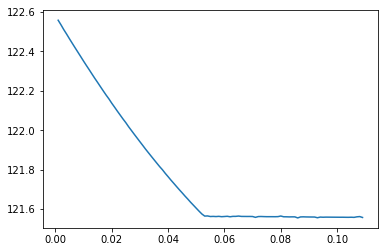

In [29]:
plt.plot(lamda_lst,RSS_lst);

### Question 5

Again, do you think that the magnitude of the features in X may affect the results with regularization?

**Answer:** Yes, I think the magnitude of the features in X may affect the results with regularization. Suppose we are using lambda = 0.01 and L1 regularization. The resulting RSS is 10079.45, much bigger than the RSS before. While this time since every feature has the same scale, we can say that alcohol is the most important feature since it has largest beta, 0.288.

In [48]:
X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)

beta0 = np.random.normal(0,1,X_train.shape[1])
lamda = 0.01
beta_hat_with_L1 = minimize(fun=Lasso, x0=beta0, args=(X_train_scale,y_train)).x
print("RSS with L1 regularization on scaled test set: ",RSS(beta_hat_with_L1,X_test_scale,y_test))

RSS with L1 regularization on scaled test set:  10079.456232620083


In [49]:
beta_hat_with_L1

array([-1.01420455,  0.08518625, -0.19965283, -0.05462014,  0.02862941,
       -0.08415666,  0.055898  , -0.11088721, -0.07042476, -0.05453225,
        0.15690765,  0.28803828])